In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import datetime
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [3]:
trash = pd.read_csv('../data/trash_hauler_report_with_lat_lng.csv')

In [4]:
trash

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
0,25270,11/1/2017,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1727970.412,686779.4781,-86.815392,36.217292
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923
3,25307,11/1/2017,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1735691.771,685027.2459,-86.789170,36.212652
4,25312,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,11/1/2019,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1781137.263,632448.5511,-86.633970,36.069130
20222,267126,11/1/2019,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6.0,1749711.399,669201.6016,-86.741242,36.169482
20223,267130,11/1/2019,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1770293.388,674936.3038,-86.671647,36.185643
20224,267134,11/1/2019,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1785224.998,627146.4002,-86.620025,36.054637


In [5]:
trash = trash.rename(columns = {
    'Request Number': 'req_num',
    'Date Opened': 'date_opened', 'Request': 'request', 'Description': 'desc', 'Incident Address': 'incident_address', 'Zip Code': 'zip', 'Trash Hauler': 'trash_hauler', 'Trash Route': 'trash_route', 'Council District': 'c_dist', 'State Plan X': 'state_x', 'State Plan Y': 'state_y', 'LONGITUDE': 'long', 'LATITUDE': 'lat', 'geometry': 'geo'})

In [6]:
trash.head()

,req_num,date_opened,request,desc,incident_address,zip,trash_hauler,trash_route,c_dist,state_x,state_y,long,lat
0,25270,11/1/2017,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1727970.412,686779.4781,-86.815392,36.217292
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923
3,25307,11/1/2017,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1735691.771,685027.2459,-86.789170,36.212652
4,25312,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861


## The first missed pickup will not result in a fine; however, every subsequent missed pickup will result in a $200 fine.

## Your job is to determine the total amount of damages due to missed pickups. Note that not all rows that you have been provided correspond to missed pickups and that you will need to ensure that you are only counting missed pickups.

In [8]:
trash['request'].nunique()

4

In [9]:
trash['request'].unique()

array(['Trash - Backdoor', 'Trash - Curbside/Alley Missed Pickup',
       'Trash Collection Complaint', 'Damage to Property'], dtype=object)

In [10]:
missing_values = trash.isna()

In [11]:
print(missing_values)

       req_num  date_opened  request   desc  incident_address    zip  \
0        False        False    False  False             False  False   
1        False        False    False  False             False  False   
2        False        False    False  False             False  False   
3        False        False    False  False             False  False   
4        False        False    False  False             False  False   
...        ...          ...      ...    ...               ...    ...   
20221    False        False    False  False             False  False   
20222    False        False    False  False             False  False   
20223    False        False    False  False             False  False   
20224    False        False    False  False             False  False   
20225    False        False    False  False             False  False   

       trash_hauler  trash_route  c_dist  state_x  state_y   long    lat  
0             False        False   False    False    False  

In [12]:
missed_request = trash.loc[trash.request.isin(['Trash - Curbside/Alley Missed Pickup'])]

In [13]:
missed_request = trash[trash['request'] == "Trash - Curbside/Alley Missed Pickup"]

In [14]:
missed_request

,req_num,date_opened,request,desc,incident_address,zip,trash_hauler,trash_route,c_dist,state_x,state_y,long,lat
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923
3,25307,11/1/2017,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1735691.771,685027.2459,-86.789170,36.212652
4,25312,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861
8,25330,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed.,4484 Lavergne Couchville Pike,37013.0,RED RIVER,4210,33.0,1794533.514,618749.3427,-86.588364,36.031728
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,11/1/2019,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1781137.263,632448.5511,-86.633970,36.069130
20222,267126,11/1/2019,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6.0,1749711.399,669201.6016,-86.741242,36.169482
20223,267130,11/1/2019,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1770293.388,674936.3038,-86.671647,36.185643
20224,267134,11/1/2019,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1785224.998,627146.4002,-86.620025,36.054637


In [15]:
missed_request.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15028 entries, 1 to 20225
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   req_num           15028 non-null  int64  
 1   date_opened       15028 non-null  object 
 2   request           15028 non-null  object 
 3   desc              14999 non-null  object 
 4   incident_address  15020 non-null  object 
 5   zip               14972 non-null  float64
 6   trash_hauler      14422 non-null  object 
 7   trash_route       14405 non-null  object 
 8   c_dist            14991 non-null  float64
 9   state_x           15007 non-null  float64
 10  state_y           15007 non-null  float64
 11  long              15007 non-null  float64
 12  lat               15007 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 1.6+ MB


## 15028 entries for MISSED

In [17]:
missed_request['incident_address'].unique()

array(['4028 Clarksville Pike', '6528 Thunderbird Dr',
       '2603 old matthews rd', ...,
       '2709 Crestdale Dr, Nashville, TN 37214, United States',
       '1621 Long Ave, Nashville, TN 37206, United States',
       '604 Somerset Ct, Nashville, TN 37217, United States'],
      dtype=object)

In [18]:
trash['date_opened'] = pd.to_datetime(trash['date_opened'], format="%m/%d/%Y")

In [19]:
trash.dtypes

req_num                      int64
date_opened         datetime64[ns]
request                     object
desc                        object
incident_address            object
zip                        float64
trash_hauler                object
trash_route                 object
c_dist                     float64
state_x                    float64
state_y                    float64
long                       float64
lat                        float64
dtype: object

In [20]:
trash['zip'] = trash['zip'].fillna(00000).astype(int)

In [21]:
trash

,req_num,date_opened,request,desc,incident_address,zip,trash_hauler,trash_route,c_dist,state_x,state_y,long,lat
0,25270,2017-11-01,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207,RED RIVER,3205,2.0,1727970.412,686779.4781,-86.815392,36.217292
1,25274,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470
2,25276,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923
3,25307,2017-11-01,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207,WASTE IND,2206,2.0,1735691.771,685027.2459,-86.789170,36.212652
4,25312,2017-11-01,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,2019-11-01,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013,RED RIVER,4502,32.0,1781137.263,632448.5511,-86.633970,36.069130
20222,267126,2019-11-01,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206,METRO,9508,6.0,1749711.399,669201.6016,-86.741242,36.169482
20223,267130,2019-11-01,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214,RED RIVER,1502,15.0,1770293.388,674936.3038,-86.671647,36.185643
20224,267134,2019-11-01,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013,RED RIVER,4502,32.0,1785224.998,627146.4002,-86.620025,36.054637


In [22]:
trash.dtypes

req_num                      int64
date_opened         datetime64[ns]
request                     object
desc                        object
incident_address            object
zip                          int32
trash_hauler                object
trash_route                 object
c_dist                     float64
state_x                    float64
state_y                    float64
long                       float64
lat                        float64
dtype: object

In [23]:
trash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20226 entries, 0 to 20225
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   req_num           20226 non-null  int64         
 1   date_opened       20226 non-null  datetime64[ns]
 2   request           20226 non-null  object        
 3   desc              20195 non-null  object        
 4   incident_address  20217 non-null  object        
 5   zip               20226 non-null  int32         
 6   trash_hauler      19325 non-null  object        
 7   trash_route       19279 non-null  object        
 8   c_dist            20177 non-null  float64       
 9   state_x           20198 non-null  float64       
 10  state_y           20198 non-null  float64       
 11  long              20198 non-null  float64       
 12  lat               20198 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int32(1), int64(1), object(5)
memory usage

In [24]:
trash['incident_address'].nunique()

14121

In [25]:
missed_request = trash[trash['request'] == 'Trash - Curbside/Alley Missed Pickup']
grouped_by_address = missed_request.groupby('incident_address')['request'].count().reset_index()

In [26]:
grouped_by_address = missed_request.groupby('incident_address').size().reset_index(name='request')

In [27]:
grouped_by_address['cost'] = (grouped_by_address['request'] - 1) * 200

In [28]:
grouped_by_address

,incident_address,request,cost
0,1 BELLE FORREST AVE C,1,0
1,10 Belle Forrest Ave,1,0
2,"100 Bluefield Square, Nashville, TN 37214, Uni...",1,0
3,100 Braxton Hill Ct,1,0
4,100 Brook Hollow Rd,1,0
...,...,...,...
11411,"Trevino Pl, Nashville, TN 37013, United States",1,0
11412,"Tusculum Rd, Nashville, TN , United States",3,400
11413,"Westboro Dr, Nashville, TN 37209, United States",1,0
11414,brick church pike,1,0


In [29]:
grouped_by_address['cost'].sum()

720800

In [30]:
missed_trash = trash[trash['desc'].str.contains('miss', case=False, na=False)]

In [31]:
missed_trash.head()

,req_num,date_opened,request,desc,incident_address,zip,trash_hauler,trash_route,c_dist,state_x,state_y,long,lat
1,25274,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470
2,25276,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923
3,25307,2017-11-01,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207,WASTE IND,2206,2.0,1735691.771,685027.2459,-86.789170,36.212652
4,25312,2017-11-01,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861
7,25327,2017-11-01,Trash Collection Complaint,"Trash out on time, miss again Tuesday. ALLEY",1816 Jo Johnston Ave,37203,METRO,9208,21.0,1731459.367,666013.6012,-86.802988,36.160330


In [32]:
missed_trash['desc'].count()

13030

In [33]:
missed_trash

,req_num,date_opened,request,desc,incident_address,zip,trash_hauler,trash_route,c_dist,state_x,state_y,long,lat
1,25274,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470
2,25276,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923
3,25307,2017-11-01,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207,WASTE IND,2206,2.0,1735691.771,685027.2459,-86.789170,36.212652
4,25312,2017-11-01,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861
7,25327,2017-11-01,Trash Collection Complaint,"Trash out on time, miss again Tuesday. ALLEY",1816 Jo Johnston Ave,37203,METRO,9208,21.0,1731459.367,666013.6012,-86.802988,36.160330
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20220,267121,2019-11-01,Trash - Curbside/Alley Missed Pickup,missed,"2709 Crestdale Dr, Nashville, TN 37214, United...",37214,RED RIVER,1502,15.0,1770240.199,676334.3993,-86.671860,36.189483
20221,267125,2019-11-01,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013,RED RIVER,4502,32.0,1781137.263,632448.5511,-86.633970,36.069130
20223,267130,2019-11-01,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214,RED RIVER,1502,15.0,1770293.388,674936.3038,-86.671647,36.185643
20224,267134,2019-11-01,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013,RED RIVER,4502,32.0,1785224.998,627146.4002,-86.620025,36.054637


In [34]:
missed_grouped_by_address = missed_trash.groupby('incident_address')['desc'].count().reset_index()

In [35]:
missed_grouped_by_address = missed_request.groupby('incident_address').size().reset_index(name='request')

In [36]:
missed_grouped_by_address

,incident_address,request
0,1 BELLE FORREST AVE C,1
1,10 Belle Forrest Ave,1
2,"100 Bluefield Square, Nashville, TN 37214, Uni...",1
3,100 Braxton Hill Ct,1
4,100 Brook Hollow Rd,1
...,...,...
11411,"Trevino Pl, Nashville, TN 37013, United States",1
11412,"Tusculum Rd, Nashville, TN , United States",3
11413,"Westboro Dr, Nashville, TN 37209, United States",1
11414,brick church pike,1


In [37]:
#missed_group_by_address['cost'] = (missed_group_by_address['desc'] - 1) * 200

In [38]:
missed_grouped_by_address.dtypes

incident_address    object
request              int64
dtype: object

In [39]:
missed_grouped_by_address['cost'] = (missed_grouped_by_address['request'] - 1) * 200

In [40]:
missed_grouped_by_address

,incident_address,request,cost
0,1 BELLE FORREST AVE C,1,0
1,10 Belle Forrest Ave,1,0
2,"100 Bluefield Square, Nashville, TN 37214, Uni...",1,0
3,100 Braxton Hill Ct,1,0
4,100 Brook Hollow Rd,1,0
...,...,...,...
11411,"Trevino Pl, Nashville, TN 37013, United States",1,0
11412,"Tusculum Rd, Nashville, TN , United States",3,400
11413,"Westboro Dr, Nashville, TN 37209, United States",1,0
11414,brick church pike,1,0


In [41]:
total_cost = missed_grouped_by_address['cost'].sum()

In [42]:
total_cost

720800

In [43]:
rr_missed = missed_trash[missed_trash['trash_hauler'] == 'RED RIVER']

In [44]:
rr_missed

,req_num,date_opened,request,desc,incident_address,zip,trash_hauler,trash_route,c_dist,state_x,state_y,long,lat
1,25274,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470
2,25276,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923
4,25312,2017-11-01,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861
8,25330,2017-11-01,Trash - Curbside/Alley Missed Pickup,Missed.,4484 Lavergne Couchville Pike,37013,RED RIVER,4210,33.0,1794533.514,618749.3427,-86.588364,36.031728
10,25341,2017-11-01,Trash - Curbside/Alley Missed Pickup,Missed trash pickup - resident has at curb for...,3113 HYDES FERRY RD,37218,RED RIVER,4204,2.0,1721577.768,676018.3999,-86.836750,36.187584
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20220,267121,2019-11-01,Trash - Curbside/Alley Missed Pickup,missed,"2709 Crestdale Dr, Nashville, TN 37214, United...",37214,RED RIVER,1502,15.0,1770240.199,676334.3993,-86.671860,36.189483
20221,267125,2019-11-01,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013,RED RIVER,4502,32.0,1781137.263,632448.5511,-86.633970,36.069130
20223,267130,2019-11-01,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214,RED RIVER,1502,15.0,1770293.388,674936.3038,-86.671647,36.185643
20224,267134,2019-11-01,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013,RED RIVER,4502,32.0,1785224.998,627146.4002,-86.620025,36.054637


In [45]:
rr_by_address = rr_missed.groupby('incident_address')['desc'].count().reset_index()

In [46]:
rr_by_address = rr_missed.groupby('incident_address').size().reset_index(name='request')

In [47]:
rr_by_address

,incident_address,request
0,"100 Bluefield Square, Nashville, TN 37214, Uni...",1
1,100 Braxton Hill Ct,1
2,100 Brook Hollow Rd,1
3,"100 Clydelan Ct, Nashville, TN 37205, United S...",1
4,"100 Desoto Dr, Nashville, TN 37210, United States",1
...,...,...
6977,"Maxwell Xing, Brentwood, Tennessee, 37027",1
6978,Robin Springs Rd,1
6979,"Trevino Pl, Nashville, TN 37013, United States",1
6980,"Westboro Dr, Nashville, TN 37209, United States",1


In [48]:
rr_by_address['request'].sum()

9586

##9586 MISSED BY RED RIVER

In [50]:
rr_by_address['cost'] = (rr_by_address['request'] - 1) * 200

In [51]:
rr_by_address

,incident_address,request,cost
0,"100 Bluefield Square, Nashville, TN 37214, Uni...",1,0
1,100 Braxton Hill Ct,1,0
2,100 Brook Hollow Rd,1,0
3,"100 Clydelan Ct, Nashville, TN 37205, United S...",1,0
4,"100 Desoto Dr, Nashville, TN 37210, United States",1,0
...,...,...,...
6977,"Maxwell Xing, Brentwood, Tennessee, 37027",1,0
6978,Robin Springs Rd,1,0
6979,"Trevino Pl, Nashville, TN 37013, United States",1,0
6980,"Westboro Dr, Nashville, TN 37209, United States",1,0


In [52]:
total_rr = rr_by_address['cost'].sum()

In [53]:
total_rr

520800

## Red River Missed = $520,800

In [55]:
##nash_map = folium.Map(location = [36.1612, -86.7775], zoom_start=12)

In [56]:
metro_missed = missed_trash[missed_trash['trash_hauler'].str.contains('metro', case=False, na=False)]

In [57]:
metro_missed

,req_num,date_opened,request,desc,incident_address,zip,trash_hauler,trash_route,c_dist,state_x,state_y,long,lat
7,25327,2017-11-01,Trash Collection Complaint,"Trash out on time, miss again Tuesday. ALLEY",1816 Jo Johnston Ave,37203,METRO,9208,21.0,1731459.367,666013.6012,-86.802988,36.160330
9,25331,2017-11-01,Trash - Curbside/Alley Missed Pickup,"Trash missed Tuesday again, ALLEY",1206 Ireland St,37208,METRO,9208,19.0,1733029.474,668762.6409,-86.797745,36.167916
12,25359,2017-11-01,Trash - Curbside/Alley Missed Pickup,Missed. Does not have access to alley.,830 Meridian St,37207,METRO,9207,5.0,1741744.712,675328.6661,-86.768395,36.186144
22,25471,2017-11-01,Trash - Curbside/Alley Missed Pickup,"Alley trash miss Tuesday, also others as well,...",1904 MeHarry Blvd,37208,METRO,9208,21.0,1730048.071,668927.1905,-86.807850,36.168301
39,25539,2017-11-02,Trash - Curbside/Alley Missed Pickup,Alley trash miss for Wednesday. Wants cart emp...,2524 Batavia St,37208,METRO,9303,21.0,1727574.081,666486.4018,-86.816162,36.161540
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20210,267002,2019-11-01,Trash - Curbside/Alley Missed Pickup,"Curb missed/trash out on time, Thursday","511 High St, Nashville, TN 37211, United States",37211,METRO,9408,16.0,1748307.399,644127.2001,-86.745352,36.100575
20212,267023,2019-11-01,Trash - Curbside/Alley Missed Pickup,Trash/missed Thursday {carts sit's on the Arch...,"1098 12th Ave S, Nashville, TN 37203, United S...",37203,METRO,9407,17.0,1736440.901,660570.3200,-86.785965,36.145489
20213,267035,2019-11-01,Trash - Curbside/Alley Missed Pickup,"constantly missed, please pick up","1400 Dickerson Pike, Nashville, TN 37207, Unit...",37207,METRO,9204,5.0,1740796.199,679412.7988,-86.771718,36.197342
20216,267089,2019-11-01,Trash - Curbside/Alley Missed Pickup,The entire street/missed/curb Thursday,"1008 Waverly Ave, Nashville, TN 37203, United ...",37203,METRO,9407,17.0,1736525.000,657016.0014,-86.785584,36.135727


In [58]:
metro_by_address = metro_missed.groupby('incident_address')['desc'].count().reset_index()

In [59]:
metro_by_address = metro_missed.groupby('incident_address').size().reset_index(name='request')

In [60]:
metro_by_address

,incident_address,request
0,1 BELLE FORREST AVE C,1
1,10 Belle Forrest Ave,1
2,"100 Marshall Ct, Nashville, TN 37212, United S...",2
3,"1000 Gilmore Ave, Nashville, TN 37204, United ...",1
4,1000 W Eastland Ave,1
...,...,...
1577,"95 Scott Ave, Nashville, TN 37206, United States",1
1578,950 strouse ave a,1
1579,"961 16th Ave N, Nashville, TN 37208, United St...",1
1580,"965 9th Ave S, Nashville, TN 37203, United States",2


In [61]:
rr_by_address['cost'] = (rr_by_address['request'] - 1) * 200

## missed by red river: 9586

In [63]:
metro_by_address['request'].sum()

2139

In [64]:
metro_by_address['cost'] = (metro_by_address['request'] - 1) * 200

In [65]:
metro_by_address

,incident_address,request,cost
0,1 BELLE FORREST AVE C,1,0
1,10 Belle Forrest Ave,1,0
2,"100 Marshall Ct, Nashville, TN 37212, United S...",2,200
3,"1000 Gilmore Ave, Nashville, TN 37204, United ...",1,0
4,1000 W Eastland Ave,1,0
...,...,...,...
1577,"95 Scott Ave, Nashville, TN 37206, United States",1,0
1578,950 strouse ave a,1,0
1579,"961 16th Ave N, Nashville, TN 37208, United St...",1,0
1580,"965 9th Ave S, Nashville, TN 37203, United States",2,200


In [66]:
total_metro_cost = metro_by_address['cost'].sum()

In [67]:
total_metro_cost

111400

## missed by metro: 2139 pickups or $111,400

In [69]:
waste_missed = missed_trash[missed_trash['trash_hauler'].str.contains('waste', case=False, na=False)]

In [70]:
waste_by_address = waste_missed.groupby('incident_address')['desc'].count().reset_index()

In [71]:
waste_by_address = waste_missed.groupby('incident_address').size().reset_index(name='request')

In [72]:
waste_by_address

,incident_address,request
0,1000 N 14th St,1
1,"1002 40th Ave N, Nashville, TN 37209, United S...",2
2,"1002 Lenore St, Nashville, TN 37206, United St...",1
3,"1003 Lenore St, Nashville, Tennessee, 37206",1
4,1003 w greenwood ave,1
...,...,...
607,"941 31st Ave N, Nashville, TN 37209, United St...",1
608,944 4th Ave S,2
609,"945 31st Ave N, Nashville, TN 37209, United St...",1
610,945 4th Ave S,1


In [73]:
waste_by_address['request'].sum()

791

## missed by waste ind: 791 pickups or $35800

In [75]:
waste_by_address['cost'] = (waste_by_address['request'] - 1) * 200

In [76]:
waste_by_address

,incident_address,request,cost
0,1000 N 14th St,1,0
1,"1002 40th Ave N, Nashville, TN 37209, United S...",2,200
2,"1002 Lenore St, Nashville, TN 37206, United St...",1,0
3,"1003 Lenore St, Nashville, Tennessee, 37206",1,0
4,1003 w greenwood ave,1,0
...,...,...,...
607,"941 31st Ave N, Nashville, TN 37209, United St...",1,0
608,944 4th Ave S,2,200
609,"945 31st Ave N, Nashville, TN 37209, United St...",1,0
610,945 4th Ave S,1,0


In [77]:
total_waste_ind = waste_by_address['cost'].sum()

In [78]:
total_waste_ind

35800

In [79]:
missed_grouped_by_route = missed_trash.groupby('trash_route')['desc'].count().reset_index()

In [80]:
missed_grouped_by_route = missed_grouped_by_route.sort_values('desc', ascending=False)

In [81]:
missed_grouped_by_route

,trash_route,desc
133,4504,258
74,3302,220
9,1303,200
124,4404,197
62,3201,187
...,...,...
134,4504S,2
22,1502S,1
105,4201S,1
52,2405S,1


## route with most missing: 4504

In [83]:
##missed_trash.plot(kind = 'barh', 
                 ##x = 'trash_hauler', 
                 ##y = 'shift_counts',
                   ##figsize=(10,10));

In [84]:
missed_trash['trash_hauler'] = missed_trash['trash_hauler'].astype(str).str.lower()

C:\Users\Lucy\AppData\Local\Temp\ipykernel_30540\1520846486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missed_trash['trash_hauler'] = missed_trash['trash_hauler'].astype(str).str.lower()


In [85]:
grouped_by_hauler = missed_trash.groupby('trash_hauler')['request'].count().reset_index()

In [86]:
grouped_by_hauler

,trash_hauler,request
0,metro,2140
1,nan,513
2,red river,9586
3,waste ind,791


In [169]:
grouped_by_hauler.sort_values("request", ascending=False)

,trash_hauler,request
2,red river,9586
0,metro,2140
3,waste ind,791
1,nan,513


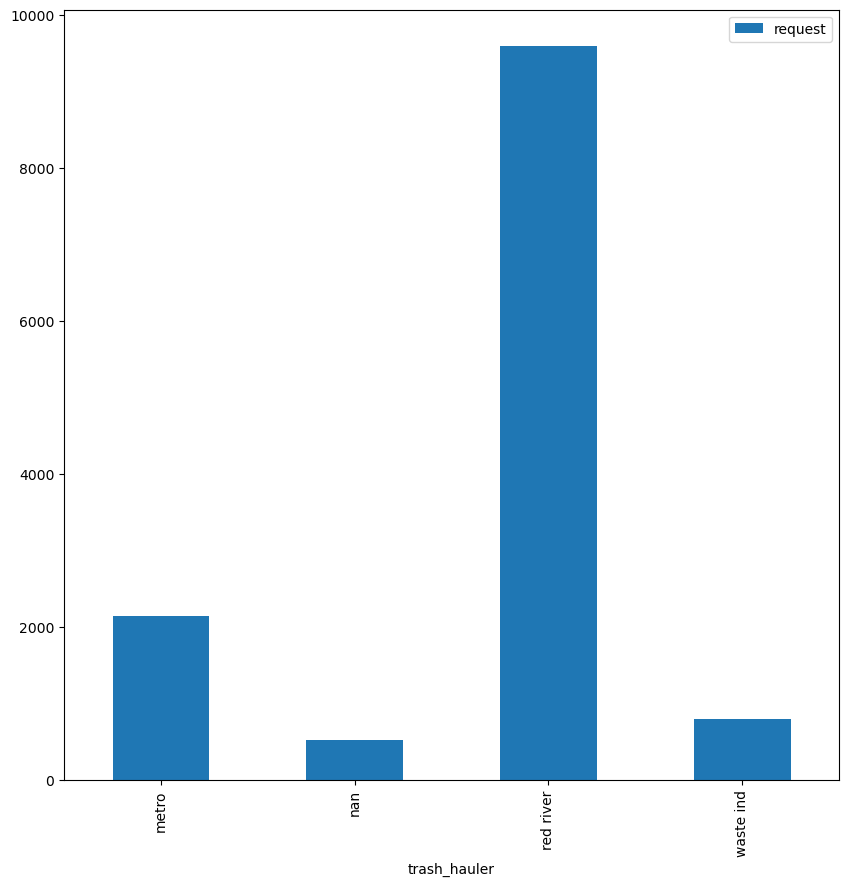

In [171]:
grouped_by_hauler.plot(kind = 'bar', 
                 x = 'trash_hauler', 
                 y = 'request',
                   figsize=(10,10));